# Some confidence intervals on the expected value of the claim frequency

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import poisson, gamma

np.random.seed(500)
NSIM = 1000
N_EXPERIMENTS = 1000
mu = 0.5

In [2]:
w_i = gamma.rvs(size=(int(NSIM), 1), a=2., scale=100)
w_i = np.tile(w_i, (1, N_EXPERIMENTS))
poi_rv = poisson(mu=w_i * mu)
sample = poi_rv.rvs(size=(NSIM, N_EXPERIMENTS))
sample_y = sample / w_i
mu_weighted = np.average(sample_y, weights=w_i, axis=0)
var_yi = sample_y.var()
poi_rv_hat = poisson(mu=mu_weighted * w_i.sum(axis=0))
ci_up = poi_rv_hat.ppf(0.975) / w_i.sum(axis=0)
ci_low = poi_rv_hat.ppf(0.025) / w_i.sum(axis=0)
theoretical_var_ybar = mu / w_i.sum(axis=0)[0]

In [3]:
theoretical_var_ybar

2.4716692201888415e-06

In [4]:
np.var(mu_weighted)

2.553996105475906e-06

In [5]:
np.sum(
    (mu < ci_up) &
    (mu >= ci_low)
    ) / N_EXPERIMENTS

0.952

In [6]:
np.sum(
    (mu < mu_weighted + 2 * np.sqrt(theoretical_var_ybar)) &
    (mu >= mu_weighted - 2 * np.sqrt(theoretical_var_ybar))
    ) / N_EXPERIMENTS

0.957

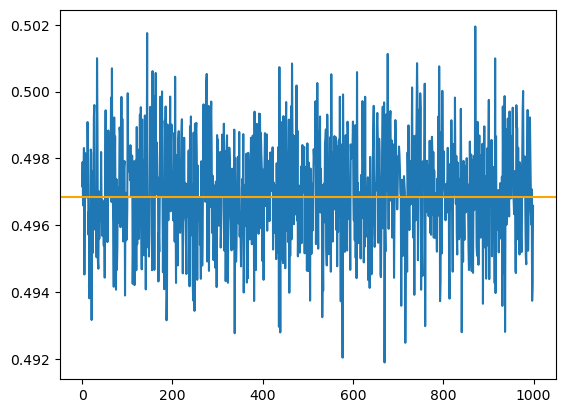

In [7]:
plt.plot(ci_low)
plt.axhline(mu - 2 * np.sqrt(theoretical_var_ybar), color="orange")

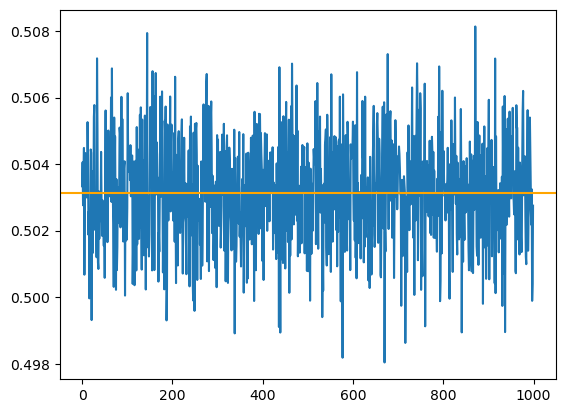

In [8]:
plt.plot(ci_up)
plt.axhline(mu + 2 * np.sqrt(theoretical_var_ybar), color="orange")